Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: rowwise* >left is a 20x4 matrix but right is a 1x4 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: rowwise* >left is a 4x20 matrix but right is a 20x1 matrix


[[-1.26861872  0.37889446 -1.32544655 -1.16143706 -0.53950986 -5.74863716
  -3.63177427 -1.80781998  0.87263439 -0.32444779  4.15314943 -0.83246837
  -1.14745671  0.63875552 -1.43279918 -0.07215075 -0.97862327  1.67188616
  -2.66838851 -2.13391419]
 [-0.29098061  0.76482233 -1.04607547 -0.61508466 -0.0568347   4.20294467
  -3.6889442  -1.9529318  -1.98926954  0.35127202 -5.6141471  -0.93345051
   0.32268847 -1.54772783 -0.20943384 -0.20660719 -0.1050453   1.81018896
  -2.74608476  0.85381903]
 [-1.08960486 -1.06213369 -1.18233085 -1.14004446 -1.55567878 -2.02412752
   0.83854998 -0.77893258 -1.42192007 -1.74453355 -2.03294494 -1.18412237
  -1.68219929 -1.79162005 -1.23370838 -1.45356117 -1.45117543 -2.27623962
   0.02862715 -1.15153423]]
[[-0.05222154]
 [-1.23814401]
 [-0.74527506]
 [-0.35893773]
 [-0.47320752]
 [ 6.82215363]
 [-4.02566362]
 [-1.62282247]
 [ 1.11891563]
 [-0.46688331]
 [ 6.53731635]
 [-0.74827773]
 [ 0.22237755]
 [ 0.713956  ]
 [ 0.09699141]
 [-0.81599216]
 [ 0.0129527

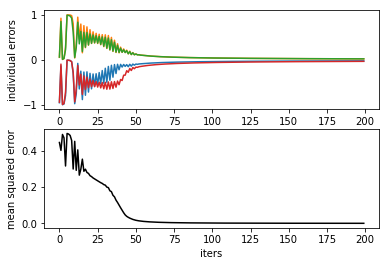

In [33]:
import numpy as np
import pyCalc as p
import random

np.random.seed(1)

p.setMode("quiet")

xs = p.constant(np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ]                           
                               , dtype= float))
ys = p.constant(np.array([0,1,1,0], dtype=float))

weights = 2*np.random.random((3,20)) - 1
weights2 = 2*np.random.random((20,1)) - 1

ws0 = p.variable(3,20)
ws1 = p.variable(20,1)


l0 = p.function(xs, ws0, "*")
l1 = p.function(l0, "sigmoid")
l10 = p.function(l1,ws1, "*")
l2 = p.function(l10, "sigmoid")

l2_error = p.function(ys.T(), l2, "-") 
sig1 = l2.deriv()
l2_delta = p.function(sig1.T(), l2_error.T(), "rowwise*")

tmp1 = p.function(l2_delta, l1, "*").T()

sig0 = l1.deriv()
l2_errorh = p.function(sig0.T(), l2_delta, "rowwise*").T()
l1_delta = p.function(l2_errorh,ws1, "rowwise*")
tmp0 = p.function(l1_delta.T(),xs, "*") 
g= []
g2= []
for i in range(200):
    t1 = weights2 + 10*tmp1.value(dict([(ws0,weights), (ws1,weights2)]))
    t0 = weights + 10*tmp0.value(dict([(ws0,weights), (ws1,weights2)])).T
    weights = t0
    weights2 = t1
    g.append(l2_error.value(dict([(ws0,weights), (ws1,weights2)])).tolist())
    g2.append(sum([ bb*bb for bb in l2_error.value(dict([(ws0,weights), (ws1,weights2)]))])/4)

              
print(weights)
print(weights2)
import matplotlib.pyplot as plt
x_data = [i for i in range(len(g))]
y_data = [[g[j][i] for j in range(len(g))]for i in range(len(g[0]))]



plt.figure(1)
plt.subplot(211)
plt.ylabel('individual errors')
plt.xlabel('iters')
for d in y_data:
    plt.plot(x_data, d)

plt.subplot(212)
plt.ylabel('mean squared error')
plt.xlabel('iters')
plt.plot(x_data, g2, 'k')
plt.show()